In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cftime

import cmocean as cm
import sys, os

import dask
from dask.distributed import Client
import warnings


import os
import re
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.stats import norm
import xesmf as xe


from scipy.stats import scoreatpercentile

from xhistogram.xarray import histogram

## CanESM5

In [2]:
canESM5 = xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/tos_Omon_CanESM5_omip1_r1i1p2f1_gn_200101-200912.nc').tos
canESM5

<xarray.DataArray 'tos' (time: 108, j: 291, i: 360)> Size: 45MB
[11314080 values with dtype=float32]
Coordinates:
  * time       (time) object 864B 2001-01-16 12:00:00 ... 2009-12-16 12:00:00
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 838kB ...
    longitude  (j, i) float64 838kB ...
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  sosstsst
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello

In [3]:
import pandas as pd
import datetime

In [4]:
ds_native = canESM5

# Create the target grid (1°x1° global)
ds_out = xr.Dataset({
    'lat': (['lat'],  np.arange(-89.5, 90.5, 1.0)),
    'lon': (['lon'],  np.arange(0.5, 360.5, 1.0)),
})

# Create regridder (uses bilinear interpolation by default)
regridder = xe.Regridder(ds_native, ds_out, method='bilinear', periodic=True)

# Apply regridding to a variable, e.g., sea surface temperature
tos_regridded = regridder(ds_native)
canESM5_gr = tos_regridded.sel(time = slice('1980','2020'))


[gadi-cpu-bdw-0001.gadi.nci.org.au:1796550] shmem: mmap: an error occurred while determining whether or not /jobfs/142336011.gadi-pbs/ompi.gadi-cpu-bdw-0001.19607/jf.0/3228565504/shared_mem_cuda_pool.gadi-cpu-bdw-0001 could be created.
[gadi-cpu-bdw-0001.gadi.nci.org.au:1796550] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


## MRI-ESM2

In [5]:
mri_esm = xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/tos_Omon_MRI-ESM2-0_omip2_r1i1p1f1_gr_165301-201812.nc', decode_times=True, use_cftime=True).tos
mri_esm=mri_esm[3924: ,:,:]
td = datetime.datetime.strptime("1980-01-01", "%Y-%m-%d")
k = 4392 -3924
d = pd.date_range(td, periods=k, freq='MS')
mri_esm=mri_esm.assign_coords({'time':d})

In [6]:
mri_esm = mri_esm.sel(time = slice('1982','2018'))

## MIROC6 - .nc file all nans atm - reload from somewhere

In [7]:
import cftime

In [10]:
miroc6 = xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/tos_Omon_MIROC6_omip2_r1i1p1f1_gn_165301-201812.nc', decode_times = False).tos

miroc6=miroc6[3924: ,:,:]
td = datetime.datetime.strptime("1980-01-01", "%Y-%m-%d")
k = 4392 -3924
d = pd.date_range(td, periods=k, freq='MS')
miroc6=miroc6.assign_coords({'time':d})


In [11]:
ds_native = miroc6

# Create the target grid (1°x1° global)
ds_out = xr.Dataset({
    'lat': (['lat'],  np.arange(-89.5, 90.5, 1.0)),
    'lon': (['lon'],  np.arange(0.5, 360.5, 1.0)),
})

# Create regridder (uses bilinear interpolation by default)
regridder = xe.Regridder(ds_native, ds_out, method='bilinear', periodic=True)

# Apply regridding to a variable, e.g., sea surface temperature
tos_regridded = regridder(ds_native)
miroc6_gr = tos_regridded.sel(time = slice('1982','2018'))
miroc6_gr

<xarray.DataArray (time: 444, lat: 180, lon: 360)> Size: 115MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2018-12-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    regrid_method:  bilinear

## IPSL - CM6A

In [11]:
# skip
ipsl = xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/tos_Omon_IPSL-CM6A-LR_omip1_r1i1p1f1_gn_163801-200912.nc').tos.sel(time=slice('1982','2020'))
ipsl

<xarray.DataArray 'tos' (time: 336, y: 332, x: 362)> Size: 162MB
[40381824 values with dtype=float32]
Coordinates:
    nav_lat  (y, x) float32 481kB ...
    nav_lon  (y, x) float32 481kB ...
  * time     (time) object 3kB 1982-01-16 12:00:00 ... 2009-12-16 12:00:00
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           Sea Surface Temperature
    units:               degC
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    cell_measures:       area: areacello
    description:         This may differ from "surface temperature" in region...
    history:             none

## FGOALS-f3-LR

In [12]:
fgoals = xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/tos_Omon_FGOALS-f3-L_omip2_r1i1p1f1_gn_165301-201812.nc').tos.sel(time=slice('1982','2020'))
fgoals 

<xarray.DataArray 'tos' (time: 444, j: 218, i: 360)> Size: 139MB
[34845120 values with dtype=float32]
Coordinates:
  * time       (time) object 4kB 1982-01-16 12:00:00 ... 2018-12-16 12:00:00
  * j          (j) int32 872B 0 1 2 3 4 5 6 7 ... 211 212 213 214 215 216 217
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 628kB ...
    longitude  (j, i) float64 628kB ...
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-08-05T02:21:20Z altered by CMOR: replaced missing va...

In [13]:
ds_native = fgoals

# Create the target grid (1°x1° global)
ds_out = xr.Dataset({
    'lat': (['lat'],  np.arange(-89.5, 90.5, 1.0)),
    'lon': (['lon'],  np.arange(0.5, 360.5, 1.0)),
})

# Create regridder (uses bilinear interpolation by default)
regridder = xe.Regridder(ds_native, ds_out, method='bilinear', periodic=True)

# Apply regridding to a variable, e.g., sea surface temperature
tos_regridded = regridder(ds_native)
fgoals_gr = tos_regridded.sel(time =slice('1982','2018'))
fgoals_gr

<xarray.DataArray (time: 444, lat: 180, lon: 360)> Size: 115MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7940925, -1.7939327, -1.7937491, ..., -1.7944388,
         -1.7943445, -1.7942294],
        [-1.7941575, -1.794202 , -1.7942392, ..., -1.7939835,
         -1.7940478, -1.794106 ],
        [-1.7958874, -1.7958467, -1.795806 , ..., -1.7960091,
         -1.7959685, -1.7959279]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7963358, -1.7960473, -1.7957699, ..., -1.7972633,
         -1.7969443, -1.7966349],
        [-1.7946848, -1.7947108, -1.7947364, ..., -1.7946045,
         -1.7946318, -1.7946585],
        [-1.789392 , -1.789355 , -1.7893171, ..., -1.7894975,
         -1.7894632, -1.789428 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.796228 , -1.7959863, -1.7957381, ..., -1.7969173,
         -1.7966933, -1.7964636],
        [-1.794553 , -1.7946225, -1.7946949, ..., -1.7943594,
         -1.7944218, -1.7944862],
        [-1.7923146, -1.7922219, -1.7921298, ..., -1.7925967,
         -1.792502 , -1.792408 ]]], dtype=float32)
Coordinates:
  * time     (time) object 4kB 1982-01-16 12:00:00 ... 2018-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    regrid_method:  bilinear

## EC-EARTH3 


In [16]:
earth3 = xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/tos_Omon_EC-Earth3_omip2_r1i1p1f1_gn_165501-201812.nc').tos
earth3

<xarray.DataArray 'tos' (time: 4392, j: 292, i: 362)> Size: 2GB
[464251968 values with dtype=float32]
Coordinates:
  * time       (time) object 35kB 1653-01-16 12:00:00 ... 2018-12-16 12:00:00
    longitude  (j, i) float64 846kB ...
    latitude   (j, i) float64 846kB ...
  * i          (i) int32 1kB 1 2 3 4 5 6 7 8 ... 355 356 357 358 359 360 361 362
  * j          (j) int32 1kB 1 2 3 4 5 6 7 8 ... 285 286 287 288 289 290 291 292
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    units:          degC
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    original_name:  tos
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2020-02-07T19:04:40Z altered by CMOR: Reordered dimension...

In [17]:
tos_subset = earth3

ds_native = tos_subset

grid_in = xr.Dataset({
    'lat': (['j', 'i'], earth3['latitude'].values),
    'lon': (['j', 'i'], earth3['longitude'].values),
})

# Create the target grid (1°x1° global)
ds_out = xr.Dataset({
    'lat': (['lat'],  np.arange(-89.5, 90.5, 1.0)),
    'lon': (['lon'],  np.arange(0.5, 360.5, 1.0)),
})

# Create regridder (uses bilinear interpolation by default)
regridder = xe.Regridder(grid_in, ds_out, method='bilinear', periodic=False, ignore_degenerate=True)

# Apply regridding to a variable, e.g., sea surface temperature
tos_regridded = regridder(ds_native)
earth3_gr = tos_regridded.sel(time =slice('1982','2018'))
earth3_gr

<xarray.DataArray (time: 444, lat: 180, lon: 360)> Size: 115MB
array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [-1.7825474, -1.7833276, -1.7840863, ..., -1.7795782,
         -1.7807304, -1.7817463],
        [-1.7641159, -1.7645221, -1.7649177, ..., -1.7628379,
         -1.7632736, -1.7636997],
        [-1.753326 , -1.753481 , -1.7536354, ..., -1.7528577,
         -1.7530143, -1.7531704]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
...
        [-1.7569853, -1.7581357, -1.7592849, ..., -1.7532778,
         -1.754585 , -1.7558337],
        [-1.7485458, -1.7492727, -1.7499921, ..., -1.7463222,
         -1.7470703, -1.7478116],
        [-1.732036 , -1.7322885, -1.7325383, ..., -1.7312627,
         -1.7315229, -1.7317808]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [-1.7562035, -1.7575322, -1.758859 , ..., -1.7519559,
         -1.7534447, -1.7548734],
        [-1.7478807, -1.7487181, -1.7495496, ..., -1.7453356,
         -1.7461891, -1.7470375],
        [-1.7367139, -1.7369723, -1.7372289, ..., -1.7359269,
         -1.7361909, -1.7364533]]], dtype=float32)
Coordinates:
  * time     (time) object 4kB 1982-01-16 12:00:00 ... 2018-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    regrid_method:  bilinear

## NorESM

In [17]:
NorESM2_gr= xr.open_dataset('/g/data/e14/ic0706/OMIP/NorESM2_gr.nc').tos
NorESM2_gr

<xarray.DataArray 'tos' (time: 324, lat: 180, lon: 360)> Size: 84MB
[20995200 values with dtype=float32]
Coordinates:
  * time     (time) object 3kB 1981-01-16 12:00:00 ... 2007-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

## ACCESS-OM2 runs 

In [18]:
om2_jra55 = xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/OM2_1deg_jra55_iaf_omip2_cycle6_sst_1mon_tropics_1982_2020.nc').sel(time=slice('1982','2018'))
om2_era5 =  xr.open_dataset('/g/data/e14/ic0706/OMIP/lowres/OM2_1deg_era5_iaf_temp_1mon_1982_2018_tropics.nc').sel(time=slice('1982','2020'))
om2_jra55=om2_jra55.rename({'xt_ocean':'lon', 'yt_ocean': 'lat'}).temp.drop('st_ocean').transpose('time', 'lat', 'lon')-273.15
om2_era5=om2_era5.rename({'xt_ocean':'lon', 'yt_ocean': 'lat'}).temp.isel(st_ocean=0).drop('st_ocean').transpose('time', 'lat', 'lon')-273.15

om2_jra55['lon'] = (om2_jra55['lon'] + 360) % 360
om2_jra55 = om2_jra55.sortby('lon')

om2_era5['lon'] = (om2_era5['lon'] + 360) % 360
om2_era5 = om2_era5.sortby('lon')
om2_era5

/jobfs/142336011.gadi-pbs/ipykernel_1796550/55890116.py:3: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  om2_jra55=om2_jra55.rename({'xt_ocean':'lon', 'yt_ocean': 'lat'}).temp.drop('st_ocean').transpose('time', 'lat', 'lon')-273.15
/jobfs/142336011.gadi-pbs/ipykernel_1796550/55890116.py:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  om2_era5=om2_era5.rename({'xt_ocean':'lon', 'yt_ocean': 'lat'}).temp.isel(st_ocean=0).drop('st_ocean').transpose('time', 'lat', 'lon')-273.15


<xarray.DataArray 'temp' (time: 444, lat: 98, lon: 360)> Size: 63MB
array([[[22.224121, 22.175934, 22.146423, ..., 22.346497, 22.295868,
         22.258667],
        [22.29187 , 22.246124, 22.251648, ..., 22.38382 , 22.340942,
         22.305603],
        [22.314606, 22.318146, 22.351929, ..., 22.425934, 22.38144 ,
         22.327393],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[23.334503, 23.244965, 23.195068, ..., 23.432129, 23.421783,
         23.38675 ],
        [23.463379, 23.4068  , 23.376556, ..., 23.533081, 23.505554,
         23.488647],
        [23.535614, 23.563354, 23.535889, ..., 23.609863, 23.553772,
         23.526703],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[21.5242  , 21.465302, 21.444794, ..., 21.790894, 21.701263,
         21.61441 ],
        [21.593994, 21.577667, 21.588531, ..., 21.76239 , 21.706116,
         21.639893],
        [21.719269, 21.703949, 21.70169 , ..., 21.82544 , 21.775238,
         21.732758],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 784B -19.36 -18.59 -17.85 ... 17.85 18.59 19.36
  * time     (time) datetime64[ns] 4kB 1982-01-16T12:00:00 ... 2018-12-16T12:...
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5

# Calculate percentiles for tropical Pacific

In [19]:
models = [mri_esm,fgoals_gr,earth3_gr,om2_jra55,om2_era5]
mod_labs = ['MRI-ESM2-0', 'FGOALS-f3-L','EC-EARTH3','ACCESS-OM2-JRA55-cycle6_iaf','ACCESS-OM2-ERA5']

In [ ]:
# for i, da in enumerate(models):
#     dt_omip.append((da*mask_tropical_pacific(da)).sel(lat = slice(-20,20), lon = slice(110,290)))

# dt_omip[0]

In [20]:

mod_labs = ['MRI-ESM2-0', 'FGOALS-f3-L','EC-EARTH3','ACCESS-OM2-JRA55-cycle6_iaf','ACCESS-OM2-ERA5']

save_directory = '/g/data/e14/ic0706/OMIP/gr/'

file_paths = [f"{save_directory}tos_global_{model}_1982-2018_gr.nc" for model in mod_labs]

for i, path in enumerate(file_paths):
    models[i].to_netcdf(path)

### Mask tropical Pacific

In [114]:
import matplotlib.path
def mask_tropical_pacific(ds):
    # Define the coordinates of the custom outline (longitude, latitude)
    LonsPts_pos = [130,120,110,110,110,260,270,270,277,291,291,130] #-np.ones(13)*180
    LatsPts_pos =[-20,-10,-5,10,20,20,15,15,10,5,-20,-20]

    sst_data = ds
    x_pixel_pos = LonsPts_pos
    y_pixel_pos = LatsPts_pos

    outline_coords = []
    for a, b in zip(x_pixel_pos, y_pixel_pos):
        outline_coords.append([a, b])
    outline_coords

    # Split the coordinates into separate lists for longitude and latitude
    lons, lats = zip(*outline_coords)

    x_pixel_pos = LonsPts_pos
    y_pixel_pos = LatsPts_pos

    temp_list = []
    for a, b in zip(x_pixel_pos, y_pixel_pos):
        temp_list.append([a, b])

    polygon = np.array(temp_list)

    xv, yv = sst_data.lon.values, sst_data.lat.values
    lon2d, lat2d = np.meshgrid(xv, yv)
    points = np.hstack((lon2d.reshape((-1,1)), lat2d.reshape((-1,1))))
    path = matplotlib.path.Path(polygon)
    mask = path.contains_points(points)
    mask.shape = lon2d.shape
    mask_bit_pos = mask*np.ones_like(lon2d)


    mask_tot = mask_bit_pos
    mask_tot[mask_tot==0] = np.nan

    return mask_tot


#tropical pacific models 

trop_pa_omip = []

for i, da in enumerate(models):
    trop_pa_omip.append((da*mask_tropical_pacific(da)).sel(lat = slice(-20,20), lon = slice(110,290)))

trop_pa_omip[0]

<xarray.DataArray 'tos' (time: 444, lat: 40, lon: 180)> Size: 26MB
array([[[        nan,         nan,         nan, ..., 23.46861649,
         22.88247299, 21.78510284],
        [        nan,         nan,         nan, ..., 23.27993584,
         22.64947319, 21.76193428],
        [        nan,         nan,         nan, ..., 22.09669113,
         22.06974411,         nan],
        ...,
        [23.46738243, 23.56021309, 23.67132378, ...,         nan,
                 nan,         nan],
        [23.01139069, 23.09633636, 23.20920372, ...,         nan,
                 nan,         nan],
        [        nan, 22.38217735, 22.63572311, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., 24.19147491,
         23.60455894, 22.52580452],
        [        nan,         nan,         nan, ..., 24.01577759,
         23.38878441, 22.55864906],
        [        nan,         nan,         nan, ..., 22.75583839,
         22.77348137,         nan],
...
        [27.13240623, 27.25145721, 27.40800667, ...,         nan,
                 nan,         nan],
        [26.87807655, 27.00969124, 27.16832542, ...,         nan,
                 nan,         nan],
        [        nan, 26.55849457, 26.7651329 , ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., 21.96320343,
         21.85211372, 21.25469589],
        [        nan,         nan,         nan, ..., 21.86544418,
         21.61340714, 21.15699387],
        [        nan,         nan,         nan, ..., 20.9232235 ,
         21.079216  ,         nan],
        ...,
        [26.06159592, 26.23751831, 26.42775536, ...,         nan,
                 nan,         nan],
        [25.62570381, 25.76274872, 26.01505852, ...,         nan,
                 nan,         nan],
        [        nan, 25.15300941, 25.44349098, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lat      (lat) float64 320B -19.5 -18.5 -17.5 -16.5 ... 16.5 17.5 18.5 19.5
  * lon      (lon) float64 1kB 110.5 111.5 112.5 113.5 ... 287.5 288.5 289.5
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2018-12-01

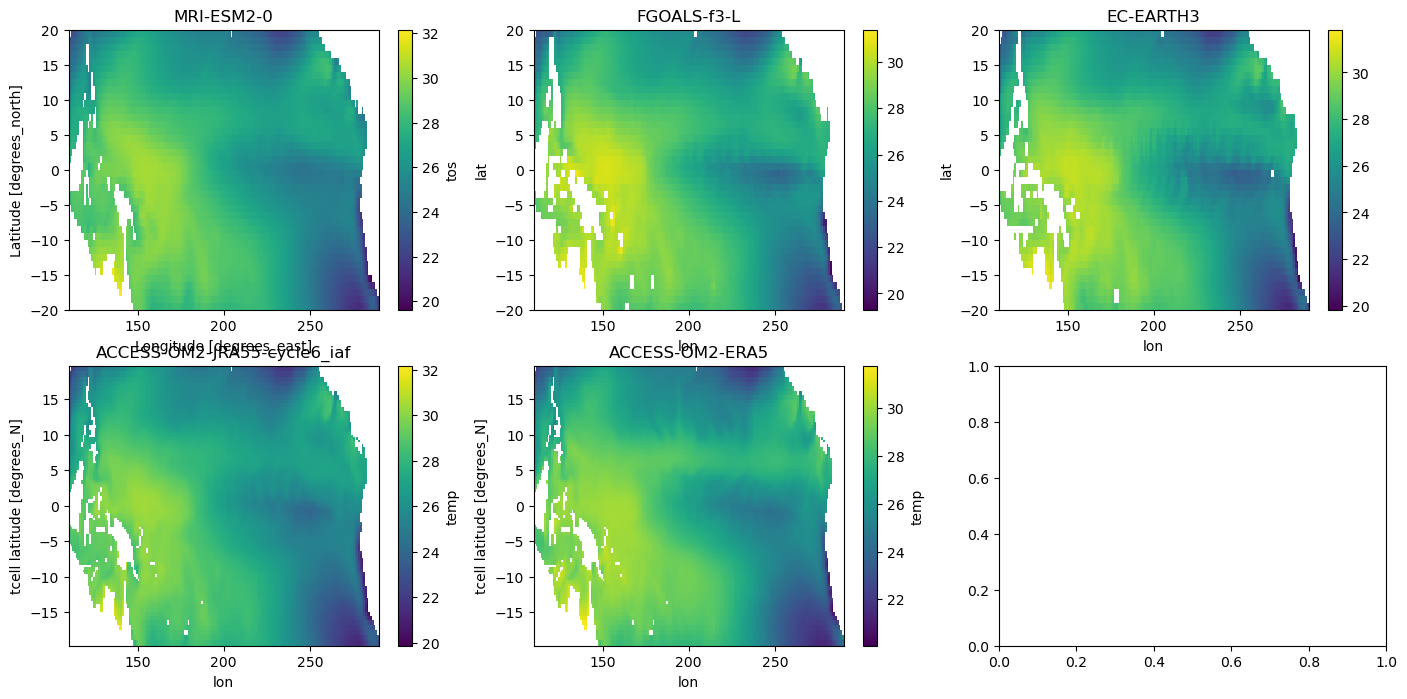

In [115]:
# check mask - plot first time step

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 8))
axes = axes.flatten()  # Make it 1D so you can index with i

for i, da in enumerate(trop_pa_omip):
    da.isel(time=0).plot(ax=axes[i])
    axes[i].set_title(mod_labs[i])

# good

# find percentiles

In [116]:
def quantiles_xhist(data,temps):
    hist_T = data#.tos
    weights = np.cos(np.deg2rad(hist_T.lat))
    times = hist_T['time']
    const_area=np.r_[0:1:0.005]
    # temps = np.r_[12:34:0.5] # define temperatures for binning 
    
    temps_interp = np.empty([len(times),len(const_area)])
    
    for i in np.r_[0:len(times):1]:  
        h=histogram(hist_T[i],bins=temps,weights=weights).cumsum()
        hh = (h - h[0])/(h[-1]-h[0])
        temps_interp[i]=np.interp(const_area,hh,temps[1:])
    
    
    sst_area= xr.DataArray(temps_interp,coords={'time':times,'area':const_area})

    return(sst_area)

#apply percentiles 

percentiles_omip = []

for i, da in enumerate(trop_pa_omip):
    da.name = 'sst'
    percentiles_omip.append(quantiles_xhist(da,np.r_[12:34:0.5]))

percentiles_omip[-1]

<xarray.DataArray (time: 444, area: 200)> Size: 710kB
array([[20.        , 21.97107485, 22.37142787, ..., 30.39687671,
        30.44614986, 30.49542301],
       [20.5       , 22.47849668, 22.94899017, ..., 30.26655729,
        30.34933428, 30.43211127],
       [19.        , 22.33862904, 22.8685945 , ..., 30.19912293,
        30.30300767, 30.40689242],
       ...,
       [16.5       , 18.4029359 , 19.23571984, ..., 30.63719737,
        30.76137467, 30.88555197],
       [18.        , 19.41984905, 20.10479342, ..., 30.69054913,
        30.80182535, 30.91310156],
       [19.        , 20.93658279, 21.33336061, ..., 30.67891986,
        30.80464099, 30.93036211]])
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-16T12:00:00 ... 2018-12-16T12:...
  * area     (area) float64 2kB 0.0 0.005 0.01 0.015 ... 0.98 0.985 0.99 0.995

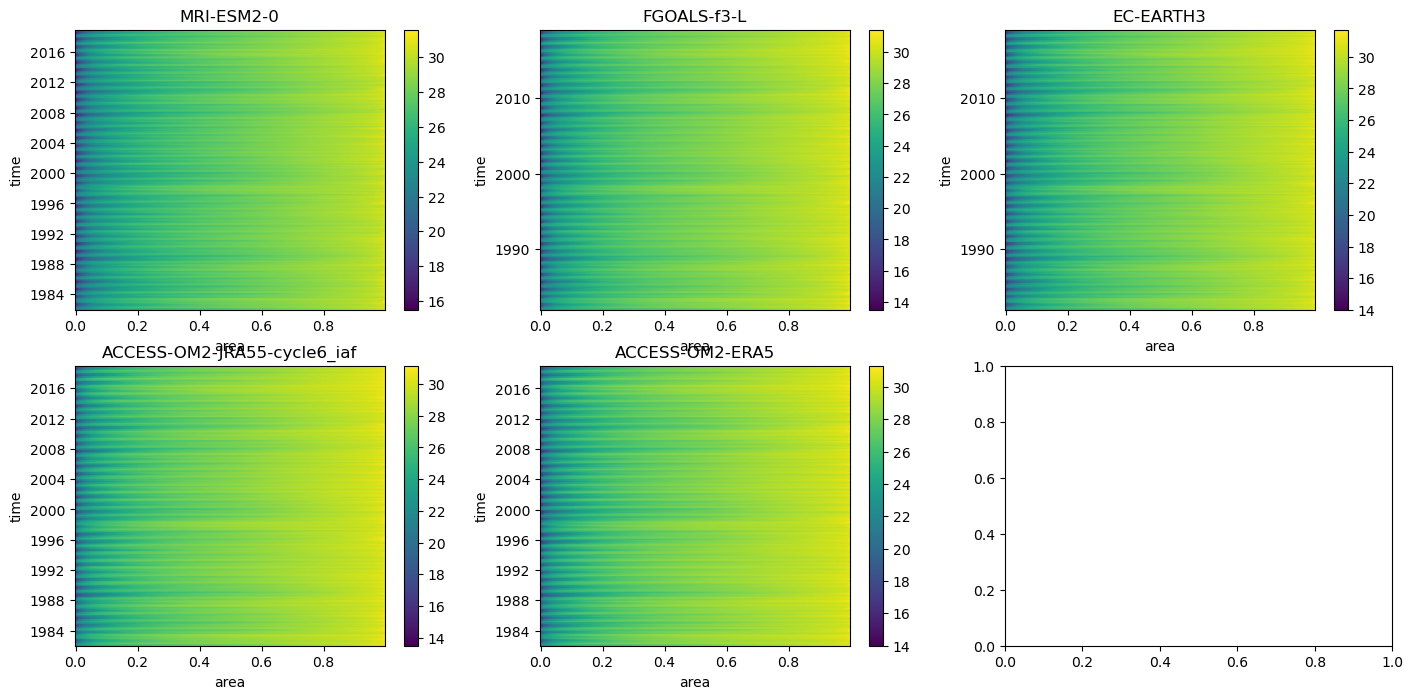

In [117]:
# check percentiles okay 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17, 8))
axes = axes.flatten()  # Make it 1D so you can index with i

for i, da in enumerate(percentiles_omip):
    da.plot(ax=axes[i])
    axes[i].set_title(mod_labs[i])
# percentiles_omip[1]

In [118]:
mod_labs = ['MRI-ESM2-0', 'FGOALS-f3-L','EC-EARTH3','ACCESS-OM2-JRA55-cycle6_iaf','ACCESS-OM2-ERA5']

save_directory = '/g/data/e14/ic0706/OMIP/gr/'

file_paths = [f"{save_directory}SST_percentile_{model}_1982-2018_gr.nc" for model in mod_labs]

for i, path in enumerate(file_paths):
    percentiles_omip[i].to_netcdf(path)

In [87]:

mod_labs = ['MRI-ESM2-0', 'FGOALS-f3-L','EC-EARTH3','ACCESS-OM2-JRA55-cycle6_iaf','ACCESS-OM2-ERA5']

save_directory = '/g/data/e14/ic0706/OMIP/gr/'

file_paths = [f"{save_directory}tos_{model}_1982-2018_gr.nc" for model in mod_labs]

for i, path in enumerate(file_paths):
    trop_pa_omip[i].to_netcdf(path)

In [ ]:

mod_labs = ['MRI-ESM2-0', 'FGOALS-f3-L','EC-EARTH3','ACCESS-OM2-JRA55-cycle6_iaf','ACCESS-OM2-ERA5']

save_directory = '/g/data/e14/ic0706/OMIP/gr/'

file_paths = [f"{save_directory}tos_global_{model}_1982-2018_gr.nc" for model in mod_labs]

for i, path in enumerate(file_paths):
    gr_omip[i].to_netcdf(path)